In [7]:
##清洗文本，只剩中文
import re
#import jieba

input_file = r'C:\Users\Administrator\NLP-class\NLP-lecture5\news_text_1.txt'
output_file = r'C:\Users\Administrator\NLP-class\NLP-lecture5\new_news_text.txt'  #创建新的文件并写入清洗后的文本

input_file_file = open(input_file, encoding='utf-8').read()
output_str_list = re.findall(r'[\u4e00-\u9fa5]',input_file_file)   #只保留中文
output_str = ''.join(output_str_list)   #字符串形式

output_file_str = open(output_file, 'w', encoding='utf-8')  ##打开清洗后需要写入的文本
output_file_str.write(output_str)   ##写入

output_file_str.close

##jieba进行分词并存入文件news_fenci

with open(r'C:\Users\Administrator\NLP-class\NLP-lecture5\new_news_text.txt',encoding='utf-8') as f:
    document = f.read()
    document_cut = jieba.cut(document)
    result = ' '.join(document_cut)
    with open(r'C:\Users\Administrator\NLP-class\NLP-lecture5\news_fenci.txt', 'w',encoding="utf-8") as f2:
        f2.write(result)


<function TextIOWrapper.close()>

In [7]:
import re
import jieba

input_file = r'C:\Users\dell\Desktop\梁少端-My works\个人文件\NLP-lecture\NLP-lecture5\new_news_text.txt'
output_file = r'C:\Users\dell\Desktop\梁少端-My works\个人文件\NLP-lecture\NLP-lecture5\news_fenci.txt'

with open(input_file,encoding='utf-8') as f:
    for line in f:
        seg = jieba.cut(line.strip(), cut_all=False)
        output = ' '.join(seg)
        with open(output_file, 'w', encoding='utf-8') as open_f:
            open_f.write(output)

In [3]:
import multiprocessing
import os
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import word2vec
sentences = word2vec.LineSentence('./news_fenci.txt')
path = get_tmpfile('gensim_w2v.model') 
model = word2vec.Word2Vec(sentences, size=200, window=5, min_count=1,workers=multiprocessing.cpu_count())
model.save('gensim_w2v.model')
model = word2vec.Word2Vec.load('gensim_w2v.model')



In [1]:
import multiprocessing
import os
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import word2vec
model = word2vec.Word2Vec.load('gensim_w2v.model')
##model.wv.most_similar('勇敢')


ModuleNotFoundError: No module named 'numpy.random._pickle'

In [6]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]
analogy('美国', '奥巴马', '美国')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


'特朗普'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4999 samples in 0.045s...
[t-SNE] Computed neighbors for 4999 samples in 9.606s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4999
[t-SNE] Computed conditional probabilities for sample 2000 / 4999
[t-SNE] Computed conditional probabilities for sample 3000 / 4999
[t-SNE] Computed conditional probabilities for sample 4000 / 4999
[t-SNE] Computed conditional probabilities for sample 4999 / 4999
[t-SNE] Mean sigma: 0.269896
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.818649
[t-SNE] KL divergence after 1000 iterations: 2.517515


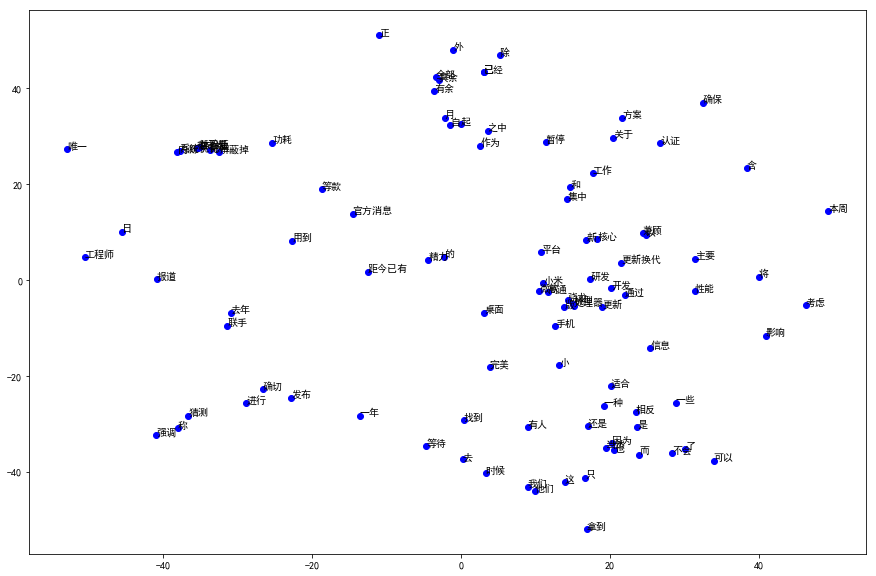

In [3]:
%matplotlib inline
from gensim.models import word2vec
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import random
from pylab import *

mpl.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

model = word2vec.Word2Vec.load('gensim_w2v.model')
 
words = list(model.wv.vocab)[1:5000]
#random.shuffle(words)
 
vector = model[words]
tsne = TSNE(n_components=2,init='pca',verbose=1)
embedd = tsne.fit_transform(vector)
 
#可视化
plt.figure(figsize=(15,10))
plt.scatter(embedd[:100,0], embedd[:100,1], c='b',marker = 'o')
 
for i in range(100):
    x = embedd[i][0]
    y = embedd[i][1]
    plt.text(x, y, words[i])
plt.show()


In [50]:
import numpy as np
import jieba
import math
#from string import punctuation
#from heapq import nlargest
from itertools import product, count
from gensim.models import word2vec
import numpy as np
import re

model = word2vec.Word2Vec.load('gensim_w2v.model')
np.seterr(all='warn')

def cut_sentences(sentence):
    puns = frozenset(u'。！？')
    tmp = []
    for ch in sentence:
        tmp.append(ch)
        if puns.__contains__(ch):
            yield ''.join(tmp)
            tmp = []
    yield ''.join(tmp)
    
def create_stopwords():
    stopwords = []
    with open("stopwords.txt", "r", encoding='utf-8-sig') as f:
        lines = f.readlines()
        for line in lines:
            stopwords.append(line.strip())
    return stopwords

def two_sentences_similarity(sents_1, sents_2):
    counter = 0
    for sent in sents_1:
        if sent in sents_2:
            counter += 1
    return counter / (math.log(len(sents_1) + len(sents_2)))


def cosine_similarity(vec1, vec2):
    tx = np.array(vec1)
    ty = np.array(vec2)
    cos1 = np.sum(tx * ty)
    cos21 = np.sqrt(sum(tx ** 2))
    cos22 = np.sqrt(sum(ty ** 2))
    cosine_value = cos1 / float(cos21 * cos22)
    return cosine_value

def compute_similarity_by_avg(sents_1, sents_2):
    if len(sents_1) == 0 or len(sents_2) == 0:
        return 0.0
    vec1 = model[sents_1[0]]
    for word1 in sents_1[1:]:
        vec1 = vec1 + model[word1]
 
    vec2 = model[sents_2[0]]
    for word2 in sents_2[1:]:
        vec2 = vec2 + model[word2]
 
    similarity = cosine_similarity(vec1 / len(sents_1), vec2 / len(sents_2))
    return similarity

def create_graph(word_sent):
    num = len(word_sent)
    board = [[0.0 for _ in range(num)] for _ in range(num)]
 
    for i, j in product(range(num), repeat=2):
        if i != j:
            board[i][j] = compute_similarity_by_avg(word_sent[i], word_sent[j])
    return board


def calculate_score(weight_graph, scores, i):
    length = len(weight_graph)
    d = 0.85
    added_score = 0.0
 
    for j in range(length):
        fraction = 0.0
        denominator = 0.0
        fraction = weight_graph[j][i] * scores[j]
        for k in range(length):
            denominator += weight_graph[j][k]
            if denominator == 0:
                denominator = 1
        added_score += fraction / denominator
    # 最终分数
    weighted_score = (1 - d) + d * added_score
    return weighted_score

def weight_sentences_rank(weight_graph):
    scores = [0.5 for _ in range(len(weight_graph))]
    old_scores = [0.0 for _ in range(len(weight_graph))]
 
    # 开始迭代
    while different(scores, old_scores):
        for i in range(len(weight_graph)):
            old_scores[i] = scores[i]
        for i in range(len(weight_graph)):
            scores[i] = calculate_score(weight_graph, scores, i)
    return scores

def different(scores, old_scores):
    flag = False
    for i in range(len(scores)):
        if math.fabs(scores[i] - old_scores[i]) >= 0.0001:
            flag = True
            break
    return flag

def filter_symbols(sents):
    stopwords = create_stopwords() + ['。', ' ', '.', ' ', '，']
    _sents = []
    for sentence in sents:
        for word in sentence:
            if word in stopwords:
                sentence.remove(word)
        if sentence:
            _sents.append(sentence)
    return _sents

def filter_model(sents):
    _sents = []
    for sentence in sents:
        for word in sentence:
            if word not in model:
                sentence.remove(word)
        if sentence:
            _sents.append(sentence)
    return _sents

def summarize(text, n):
    tokens = cut_sentences(text)
    sentences = []
    sents = []
    for sent in tokens:
        sentences.append(sent)
        sents.append([word for word in jieba.cut(sent) if word])
 
    sents = filter_symbols(sents)
    sents = filter_model(sents)
    graph = create_graph(sents)
 
    scores = weight_sentences_rank(graph)
    sent_selected = nlargest(n, zip(scores, count()))
    sent_index = []
    for i in range(n):
        sent_index.append(sent_selected[i][1])
    return [sentences[i] for i in sent_index]

with open("news_test.txt", "r", encoding='utf-8-sig') as file:
        text = file.read().replace('\n', '')
        print(summarize(text, 1))



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:126: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


KeyError: "word ' ' not in vocabulary"